In [1]:
import numpy as np
import math as m
import sklearn as sk
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import copy as cp

In [2]:
X,y = make_moons(n_samples=2000, shuffle=True, noise =0.7)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1000, train_size=1000, shuffle=True)

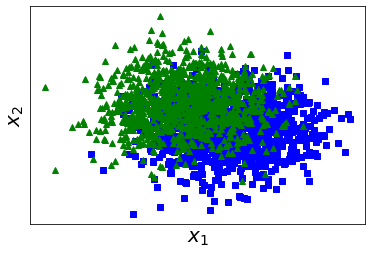

In [3]:

plt.plot(X[:, 0][y==1], X[:, 1][y==1],'bs')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'g^')

# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
plt.xticks([])
plt.yticks([])

# Displaying the plot.
plt.show()

In [4]:
def accuracy(y,pred):
    n=0
    for i in range(len(y)):
        if y[i]==pred[i]:
            n+=1
    return n/len(y)

In [5]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=200)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
accuracy(y_test,pred)


0.738

In [6]:
# random forest
from sklearn.ensemble import RandomForestClassifier

neigh = RandomForestClassifier(n_estimators=200)
neigh.fit(X_train, y_train)
X2,y2 = make_moons(n_samples=1000, shuffle=True, noise =0.03)
pred = neigh.predict(X_test)
accuracy(y_test,pred)

0.718

In [7]:
# SVM
from sklearn.svm import SVC

neigh = SVC()
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
accuracy(y_test,pred)

0.742

#On utilise la fonction predict de sklearn pour prédire la classe pour toute donnée


In [92]:
def SL(X,a0,a1,n): # fonctionnement mais à verifier
    X= X.reshape(-1)
    d = X.shape[0]
    # distribution gaussienne centrée réduite de taille n*d
    Z1 = np.random.normal(0,1,(n,d))
    #normalisé par la norme de chacun des Zi
    Z2 = Z1 / np.linalg.norm(Z1,axis=1).reshape(-1,1)
    #uniforme sur [a0**d,a1**d]
    u = np.random.uniform(a0**d,a1**d,(n,1))
    u2 = u/u**d
    #projection sur l'hyperplan et translation
    S = X + Z2*u 
    return S

# algorithme growing spheres generation à finir 
def algo_GSG(X,y,classifier,eta,n): 
    d = X.shape[0]
    z = SL(X,0,eta,n)
    y2 = np.ones((n))*y
    prediction = classifier.predict(z)
    while True:
        if prediction.all() == y:
            break
        else:
            eta = eta/2
            z = SL(X,0,eta,n)
            prediction = classifier.predict(z)
    
    a0 = eta
    a1 = 2*eta
    while True:
        if (prediction != y2).any():
            break
        else:
            z = SL(X,a0,a1,n)
            prediction = classifier.predict(z)
            a0 = a1
            a1 = a1+eta
    
    
    enemys= np.argwhere(prediction!=y2)
    enemy = m.inf
    for i in enemys:
        if np.linalg.norm(z[i]-X) < enemy:
            enemy = np.linalg.norm(z[i]-X)
            ene = z[i,:]  

    return ene



In [8]:
def SL(X,a0,a1,n): # fonctionnement mais à verifier
    X= X.reshape(-1)
    d = X.shape[0]
    # distribution gaussienne centrée réduite de taille n*d
    Z1 = np.random.normal(0,1,(n,d))
    #normalisé par la norme de chacun des Zi
    Z2 = Z1 / np.linalg.norm(Z1,axis=1).reshape(-1,1)
    #uniforme sur [a0**d,a1**d]
    u = np.random.uniform(a0**d,a1**d,(n,1))
    u2 = u/u**d
    #projection sur l'hyperplan et translation
    S = X + Z2*u 
    return S

# algorithme growing spheres generation à finir 
def algo_GSG(X,classifier,eta,n): 
    d = X.shape[0]
    z = SL(X,0,eta,n)
    fx = np.ones((n) )* classifier.predict(X.reshape(1,-1))
    prediction = classifier.predict(z)
    while True:
        if (prediction == fx).all():
            break
        else:
            eta = eta/2
            z = SL(X,0,eta,n)
            prediction = classifier.predict(z)
    
    a0 = eta
    a1 = 2*eta
    while True:
        if (prediction != fx).any():
            break
        else:
            z = SL(X,a0,a1,n)
            prediction = classifier.predict(z)
            a0 = a1
            a1 = a1+eta
    
    enemys= np.argwhere((prediction!=fx))
    enemy = m.inf
    for i in enemys:
        if np.linalg.norm(z[i]-X) < enemy:
            enemy = np.linalg.norm(z[i]-X)
            ene = z[i,:]  

    return ene



<function matplotlib.pyplot.show(close=None, block=None)>

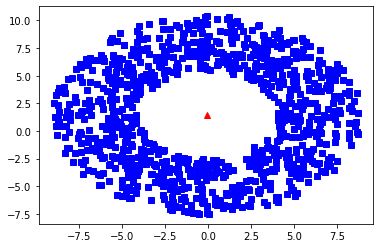

In [9]:
f = SL(X_test[0],2,3,1000)
plt.plot(f[:,0],f[:,1],'bs')
plt.plot(X_test[0,0],X_test[0,1],'r^')
plt.show

In [16]:
for i in range(1000):
    res = algo_GSG(X[i],neigh,1,1000)
    print(res)

[[1.28933194 0.2048858 ]]
[[1.31729297 0.21184516]]
[[-0.39972605  0.144257  ]]
[[-0.62149901 -0.88406976]]
[[1.18773234 0.09552921]]
[[1.36887019 0.26264111]]
[[1.08916073 0.06914371]]
[[0.18603829 0.3777769 ]]
[[1.13607861 0.08154261]]
[[0.21080052 0.35657075]]
[[0.94208221 0.02187028]]
[[0.28567117 0.33051639]]
[[0.83727738 0.04276179]]
[[-0.31606295  0.26190918]]
[[0.79202907 0.04304128]]
[[0.01780991 0.39685585]]
[[0.87034183 0.05581195]]
[[1.3611479  0.25715617]]
[[-0.3545156   0.20935216]]
[[-0.40954995  0.11729182]]
[[0.63311109 0.13437068]]
[[-0.02111967  0.41812404]]
[[0.57588737 0.15628418]]
[[-0.14198261  0.39175097]]
[[0.5228534  0.18946073]]
[[1.16969202 0.08616159]]
[[0.16460193 0.35980079]]
[[0.85893296 0.03861271]]
[[1.10863957 0.05314587]]
[[-0.51380066 -0.18753815]]
[[1.34065684 0.2635424 ]]
[[0.5113931  0.19324935]]
[[0.46275774 0.226357  ]]
[[-0.19845573  0.3552293 ]]
[[0.03117575 0.40971832]]
[[0.01259716 0.42005699]]
[[-0.30963117  0.2625785 ]]
[[-0.12645138  0.3

In [103]:
def algo_GSFS(X,classifier,enemy):
    e_prime = cp.deepcopy(enemy)
    X = X.reshape(1,-1)

    while classifier.predict(e_prime) != classifier.predict(X.reshape(1,-1)) and (e_prime != X).all():
        e_best = cp.deepcopy(e_prime)
        i = np.argmin(np.linalg.norm(e_prime-X,axis=0),axis=0)
        e_prime[:,i]= X[:,i]
        
    #print("enemy",enemy, classifier.predict(enemy.reshape(1,-1)))
    #print("X",X, classifier.predict(X))
    #print("e_prime",e_prime, classifier.predict(e_prime))
    #print("e_best",e_best, classifier.predict(e_best))
    #print("enemy != e_best", enemy,classifier.predict(enemy) , e_best,classifier.predict(e_best), X, classifier.predict(X))
    if (enemy != e_best).any():
        print("hi")
    
    return e_best, i

In [53]:
def algo_GSFS(X,classifier,enemy):
    e_prime = cp.deepcopy(enemy).flatten()
    e_best = cp.deepcopy(e_prime)
    X = X.flatten()
    move_sorted = sorted(enumerate(abs(e_prime - X)), key=lambda x: x[1])
    move_sorted = [x[0] for x in move_sorted if x[1] > 0.0]
    out = e_prime.copy()
    reduced = 0

    for k in move_sorted:
        new_enn = out.copy()
        new_enn[k] = X[k]
        condition_class = classifier.predict(new_enn.reshape(1, -1)) != classifier.predict(X.reshape(1,-1))
        
        if condition_class:
                out[k] = new_enn[k]
                reduced += 1
                
        
    print("enemy",enemy, classifier.predict(enemy.reshape(1,-1)))
    print(out, classifier.predict(out.reshape(1,-1)))
    print("X",X, classifier.predict(X.reshape(1,-1)))
    #print("e_prime",e_prime, classifier.predict(e_prime.reshape(1,-1)))
    #print("e_best",e_best)
    
    print("Reduced %d coordinates"%reduced)
    print()

    return out

In [11]:
def algo_GS(X,classifier,eta,n):
    enemy = algo_GSG(X,classifier,eta,n)
    e_best, i = algo_GSFS(X,classifier,enemy)
    return e_best, i

In [10]:
def algo_GSFS(X,classifier,enemy):
    e_prime = cp.deepcopy(enemy)
    X = X.reshape(1,-1)

    while classifier.predict(e_prime) != classifier.predict(X.reshape(1,-1)) and (e_prime != X).all():
        e_best = cp.deepcopy(e_prime)
        i = np.argmin(np.linalg.norm(e_prime-X,axis=0),axis=0)
        e_prime[:,i]= X[:,i]
        
    print("enemy",enemy, classifier.predict(enemy.reshape(1,-1)))
    print("X",X, classifier.predict(X))
    #print("e_prime",e_prime, classifier.predict(e_prime))
    print("e_best",e_best, classifier.predict(e_best))
    if (enemy != e_best).any():
        print("hi")
    
    return e_best, i

In [12]:
for i in range(0,100):
    algo_GS(X_test[i,:],neigh,0.5,100)

1
enemy [[1.14330041 0.79791502]] [1]
X [[-0.09407513  1.4542947 ]] [0]
e_best [[1.14330041 0.79791502]] [1]
1
enemy [[0.87074647 0.62352124]] [0]
X [[1.11144596 0.39127942]] [1]
e_best [[0.87074647 0.62352124]] [0]
1
enemy [[-0.10358051 -0.1751427 ]] [0]
X [[ 0.05075984 -0.3099919 ]] [1]
e_best [[-0.10358051 -0.1751427 ]] [0]
0
enemy [[1.15167438 0.8553551 ]] [1]
X [[0.27471931 1.79754601]] [0]
e_best [[1.15167438 0.8553551 ]] [1]
0
enemy [[0.79721139 0.68498244]] [0]
X [[1.13391368 0.27770799]] [1]
e_best [[0.79721139 0.68498244]] [0]
0
enemy [[1.14385125 0.97399129]] [1]
X [[0.6031966  1.61984832]] [0]
e_best [[1.14385125 0.97399129]] [1]
1
enemy [[1.25270747 1.75418045]] [0]
X [[2.36878494 1.07808525]] [1]
e_best [[1.25270747 1.75418045]] [0]
0
enemy [[-0.48247094 -0.62267892]] [1]
X [[-1.86462491  1.07032513]] [0]
e_best [[-0.48247094 -0.62267892]] [1]
1
enemy [[-0.01935809 -0.31813761]] [1]
X [[-1.34102877  0.1946725 ]] [0]
e_best [[-0.01935809 -0.31813761]] [1]
0
enemy [[ 0.1074